
# Exercise Eleven: PCA
I initially drew on the class example and the discussion of PCA in the Data-Sitters Club, which enabled the code to flow from the beginning.

I went eleven toward importing documents from the use of .pdf files, mainly due to my usual use of research archives and libraries toward dissertational and assignment references.  In this case, I explored lager .pdf's in the form of the Hollywood Reporter, mainly for its texted pages of industry, but also to see if it was doable with the gigabytes that were needed to explore even amidst imagery and photos, which allowed for favoritism with the OS module to become relevant to process the text.

Once this was established, the following directives were explored through the process:

- Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis
- Load the documents and titles and run the contents through vectorize, using the provided boilerplate
- Run a simple (2 word) visualization comparing all texts
- Run a full (PCA) visualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief
  analysis.

Bonus Challenge: This shows an example of collecting the texts from PDF files. Note it is also adjusted to handle shorter texts (rather than the novels from our previous example)


(Karsdorp, Kestemont, and Riddell 126).

## Stage One: Import at least ten documents from files, using the OS module and any others relevant to process the text

(Karsdorp, Kestemont, and Riddell 126).

In [103]:
from pdfminer.high_level import extract_text
import os

textdir = 'D:\\D&D\\Hollywood Reporter\\Report\eleven\\pdf\\'
os.chdir(textdir)

In [104]:
# #NLTK is the NLP package we're using
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Stage Two: Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis
(Karsdorp, Kestemont, and Riddell 126).

In [105]:
#For each filename in the directory you listed...
for filename in os.listdir(textdir):
    #If the filename ends with .pdf...
    if filename.endswith('.pdf'):
        text = extract_text(filename)
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.pdf','-nouns.txt')
        #Open the output file
        with open(outname, 'w', errors="replace") as out:
            #Split the text into a list of sentences
            sentences = nltk.sent_tokenize(text)
            #For each sentence in the list of sentences...
            for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                    #If the part-of-speech is noun
                    if (pos == 'NN' or pos == 'NNS'):
                        #Write the word (which should be a noun) to the output file
                        out.write(word)
                        #Write a space so the words don't smush together
                        out.write(' ')

## Stage Three: Load the documents and titles and run the contents through vectorize, using the provided boilerplate
(Karsdorp, Kestemont, and Riddell 126).

In [106]:
def load_directory(directory):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-nouns.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()

        documents.append(' '.join(lemmas))
        title = filename.name.replace('-nouns.txt', '')
        titles.append(f"{title}")
    return documents, titles

## Stage Four: Run a simple (2 word) vizualization comparing all texts
(Karsdorp, Kestemont, and Riddell 126)

In [107]:
documents, titles = load_directory(textdir)
import sklearn.feature_extraction.text as text
print(titles[0:6])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

['Hollywood Reporter Aug. 11, 2021', 'Hollywood Reporter Aug. 23, 2021', 'Hollywood Reporter Aug. 5, 2021', 'Hollywood Reporter July 21, 2021', 'Hollywood Reporter June 17, 2021', 'Hollywood Reporter June 30, 2021']
(11, 30)
['business', 'comedy', 'company', 'director', 'e', 'family', 'film', 'ing', 'lot', 'movie']


## Stage Five: Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis
(Karsdorp, Kestemont, and Riddell 126).

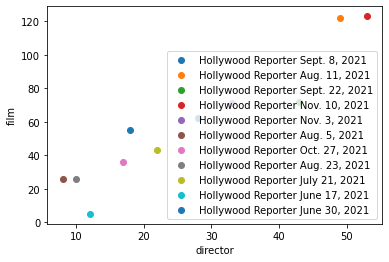

In [108]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('director')]
y = v_documents[:, words.index('film')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='director', ylabel='film')
plt.legend();

In [109]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(11, 30)
(11, 2)


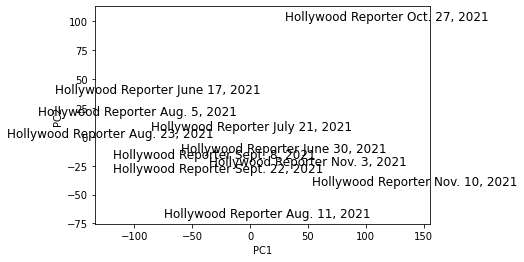

In [110]:

c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title, fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');

## Bonus Stage: Depending on your interests, you might either try using an API to collect the texts rather than saving them to a directory, or you might use Bokeh to attempt an exportable visualization of some aspect of what you've collected.
(Karsdorp, Kestemont, and Riddell 126).